# Discrete Fourier Transform

## Conventions
Fourier transform in time
$$
a(\omega) = \int a(t) e^{i \omega t}dt, \\
a(t) = \frac{1}{2 \pi}\int a(\omega) e^{-i \omega t}d\omega.
$$
With this definition, the function $a(t)$ is expressed as a combination of oscillations in $e^{-i\omega t}$ at all different frequencies.
Similarly in space we have
$$
a(\mathbf{k}) = \int a(\mathbf{r}) e^{-i \mathbf{k} \cdot \mathbf{r}}d\mathbf{r}, \\
a(\mathbf{r}) = \frac{1}{(2 \pi)^3}\int a(\mathbf{k}) e^{i \mathbf{k} \cdot \mathbf{r}}d\mathbf{k}.
$$
From the above definition, a function of space and time $a(\mathbf{r}, t)$ is a combination of waves with phase factors $e^{\mathbf{k}\cdot\mathbf{r} - \omega t}$.
Using the definition of delta function, we have the following completeness relations:
$$
2\pi\delta(\omega) = \int e^{i \omega t}dt, \\
\delta(t) = \frac{1}{2 \pi}\int e^{-i \omega t}d\omega,
$$
and
$$
(2 \pi)^3 \delta(\mathbf{k}) = \int e^{-i \mathbf{k} \cdot \mathbf{r}}d\mathbf{r}, \\
\delta(\mathbf{r}) = \frac{1}{(2 \pi)^3}\int e^{i \mathbf{k} \cdot \mathbf{r}}d\mathbf{k}.
$$

## Discrete systems
Here we consider a one-dimensional system in space. The discrete Fourier transform of the system is given by
$$
a_k = \frac{1}{\sqrt{N}} \sum_n a_n e^{-ikn}, \\
a_n = \frac{1}{\sqrt{N}} \sum_k a_k e^{ikn},
$$
where
$$
n = 0, 1, 2, \cdots, N - 1,
$$
and
$$
k = 0, \frac{2\pi}{N}, \frac{2 \cdot 2\pi}{N}, \cdots, \frac{(N - 1) \cdot 2\pi}{N}.
$$
Here the choice of numbering $n$ is arbitrary and can be any consecutive $N$ numbers, my choice is to make the indexing consistent with Python's indexing.

The above definition is the one that's most commonly used. Another choice that I like to use is putting the factor $1/N$ in the inverse transform:
$$
a_k = \sum_n a_n e^{-ikn}, \\
a_n = \frac{1}{N} \sum_k a_k e^{ikn}.
$$
When going from the above to the continuous limit, we immediately recover the convention above. This is in fact the most common convention for calculating discrete Fourier transform.

Here we use the convention with the $1/\sqrt{N}$ factor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

In [2]:
def plot_function(func):
    re = func.real
    im = func.imag
    index = np.arange(len(func))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].plot([index[0], index[-1]], [0, 0], c='gray', ls='--')
    axes[1].plot([index[0], index[-1]], [0, 0], c='gray', ls='--')
    for i in range(len(index)):
        axes[0].plot([index[i], index[i]], [0, re[i]], c='b')
        axes[1].plot([index[i], index[i]], [0, im[i]], c='b')
    
    axes[0].scatter(index, re, edgecolor='r', facecolor='none', s=80, clip_on=False)
#     axes[0].set_xticks(index)
    axes[0].set_title('Real')

    axes[1].scatter(index, im, edgecolor='r', facecolor='none', s=80, clip_on=False)
#     axes[1].set_xticks(index)
    axes[1].set_title('Imaginary')

    plt.tight_layout()

In [3]:
def fourier_transform(func, inverse=False):
    # For correct labeling of k's multiply the indcies by 2 pi / N
    N = len(func)
    sign = 1 if inverse else -1
    k_dot_n = np.outer(np.arange(N), np.arange(N)) * 2 * np.pi / N
    return (func * np.exp(sign * 1j * k_dot_n)).sum(axis=1) / np.sqrt(N)

## Example 1
Trivial case $N=1$.

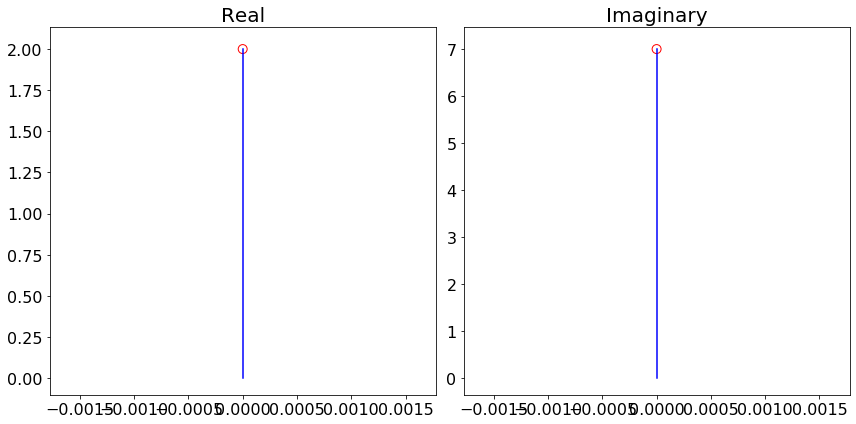

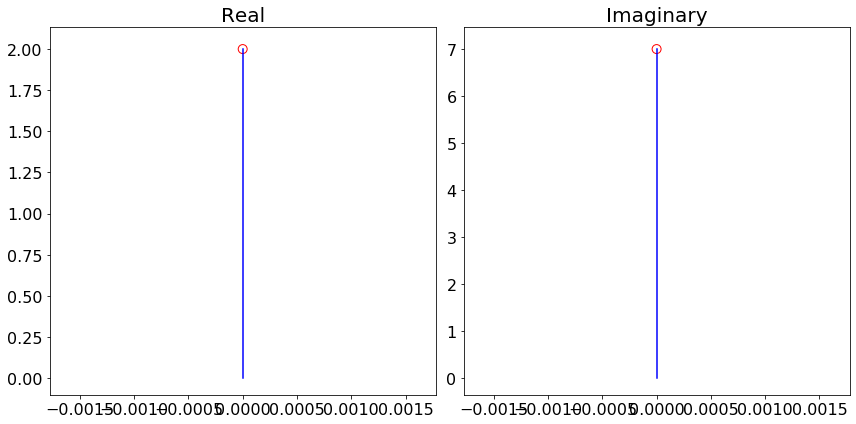

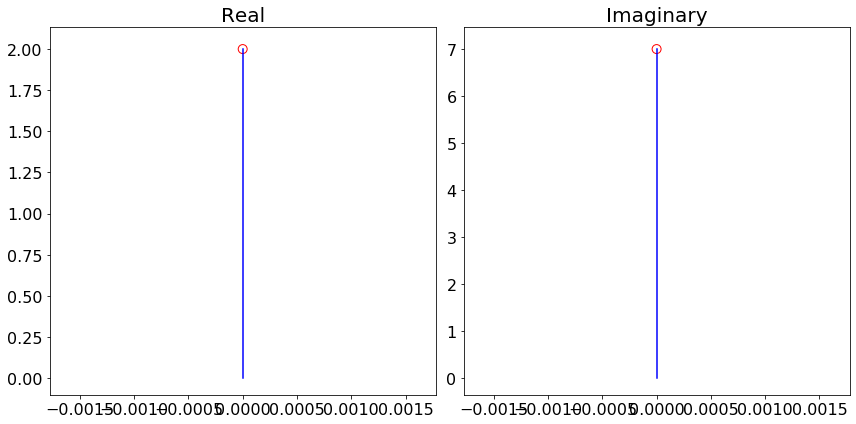

In [4]:
A_n = np.array([2 + 7j])
A_k = fourier_transform(A_n)
A_n_ift = fourier_transform(A_k, inverse=True)
plot_function(A_n)
plot_function(A_k)
plot_function(A_n_ift)

## Example 2
$N=5$

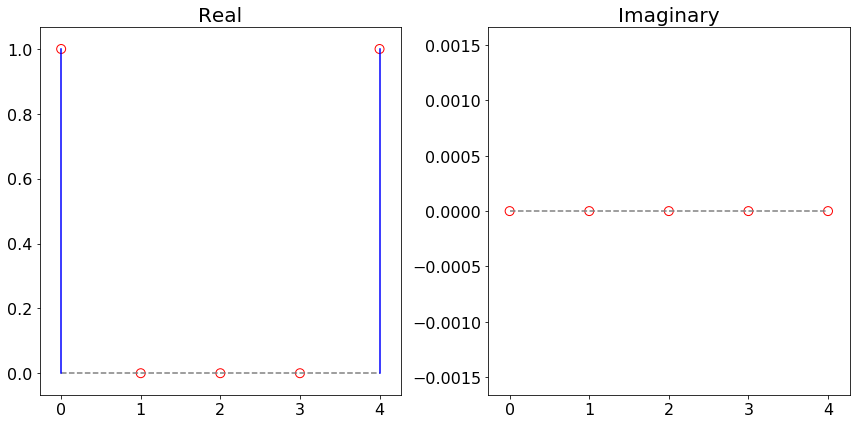

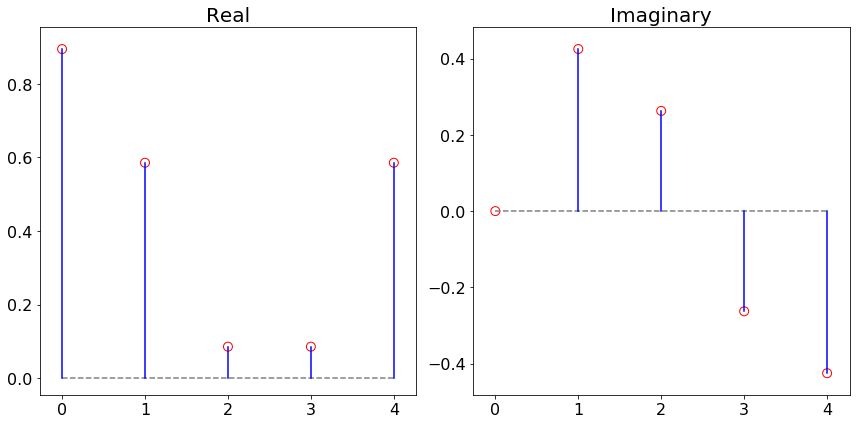

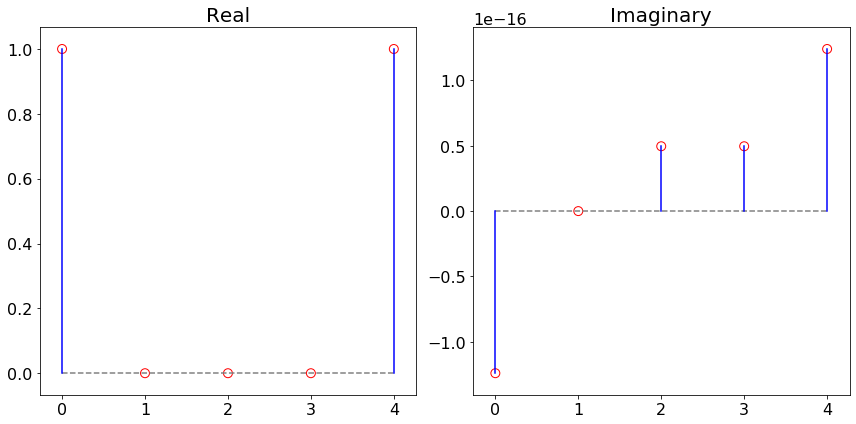

In [5]:
A_n = np.array([1, 0, 0, 0, 1])
A_k = fourier_transform(A_n)
A_n_ift = fourier_transform(A_k, inverse=True)
plot_function(A_n)
plot_function(A_k)
plot_function(A_n_ift)

For this case we do see some negligible imaginary part in the inverse transform.

## Example 3
A constant function, $N=30$.

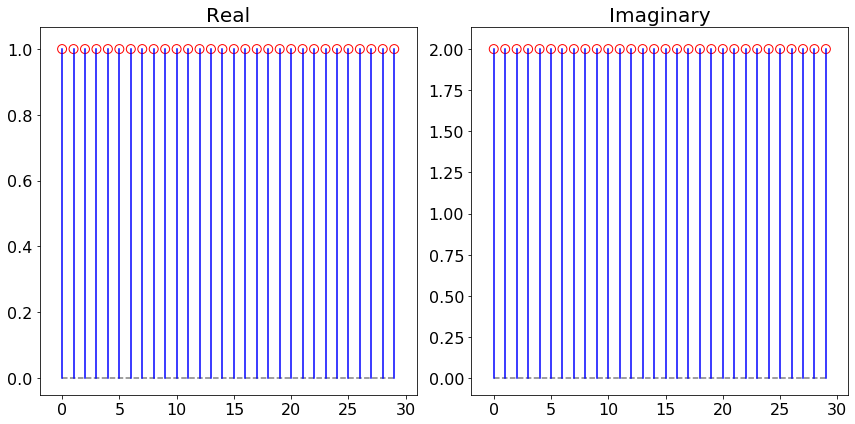

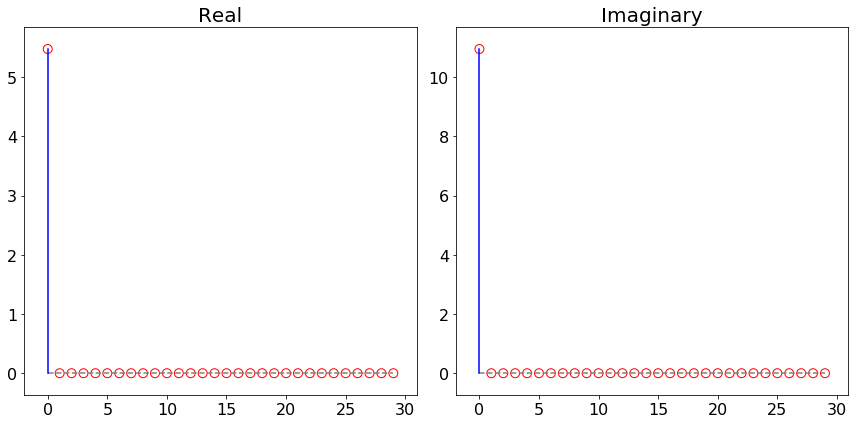

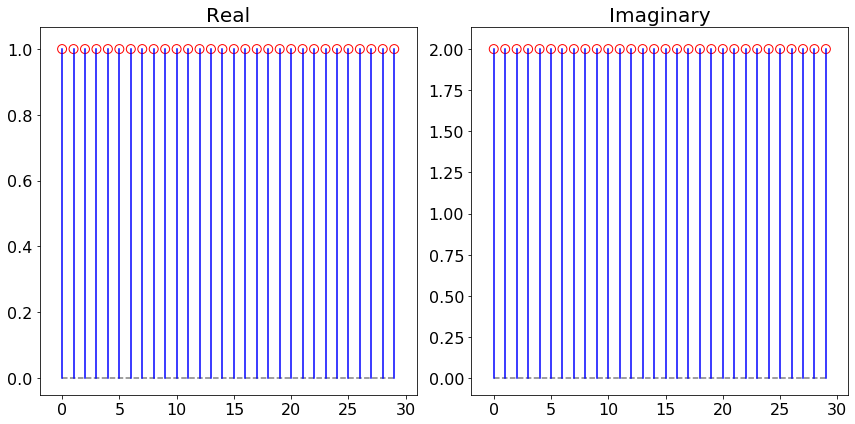

In [6]:
A_n = np.full(30, 1 + 2j)
A_k = fourier_transform(A_n)
A_n_ift = fourier_transform(A_k, inverse=True)
plot_function(A_n)
plot_function(A_k)
plot_function(A_n_ift)

## Example 4
A sin function, $N=40$.

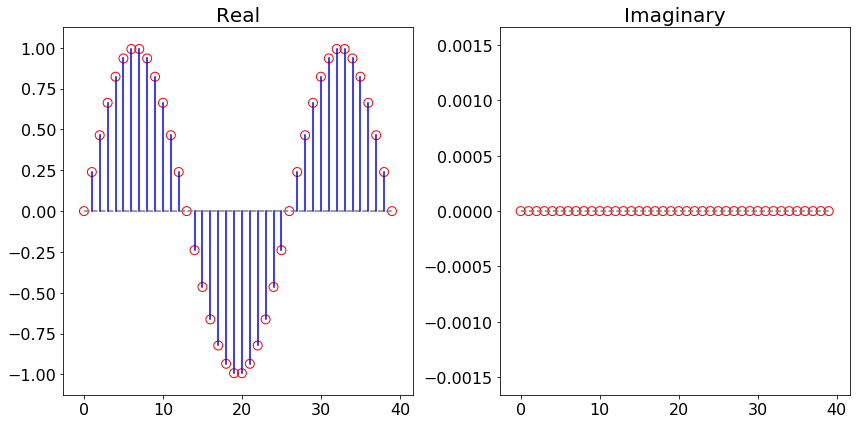

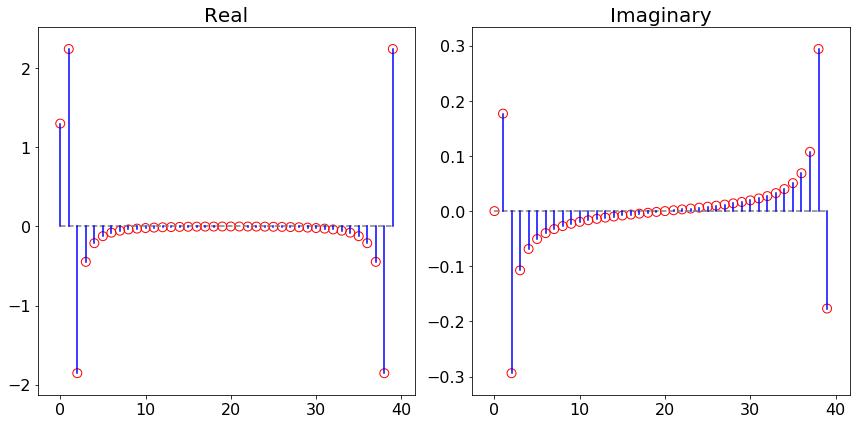

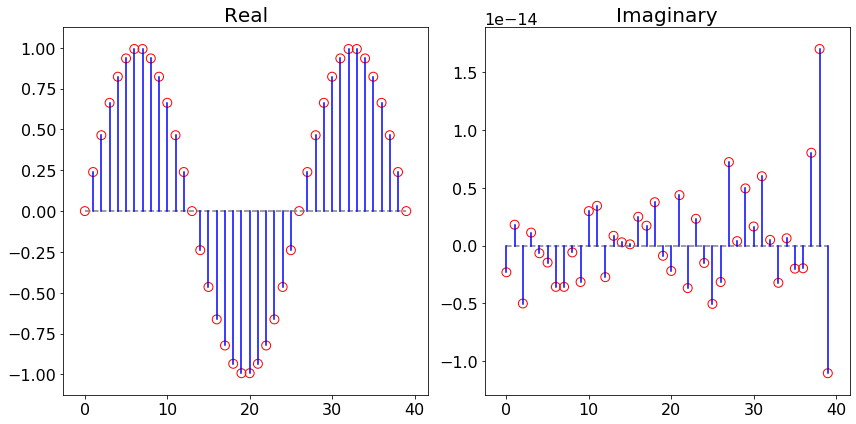

In [7]:
A_n = np.sin(np.linspace(0, 3 * np.pi, 40))
A_k = fourier_transform(A_n)
A_n_ift = fourier_transform(A_k, inverse=True)
plot_function(A_n)
plot_function(A_k)
plot_function(A_n_ift)

## Example 5
A normally distributed function, $N=100$.

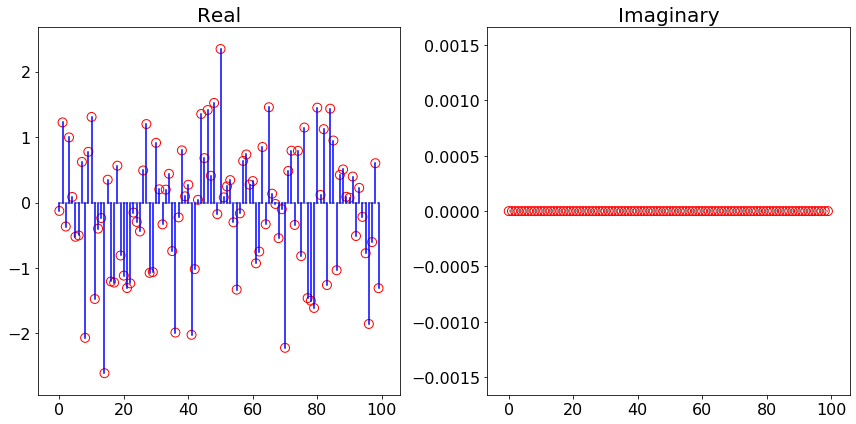

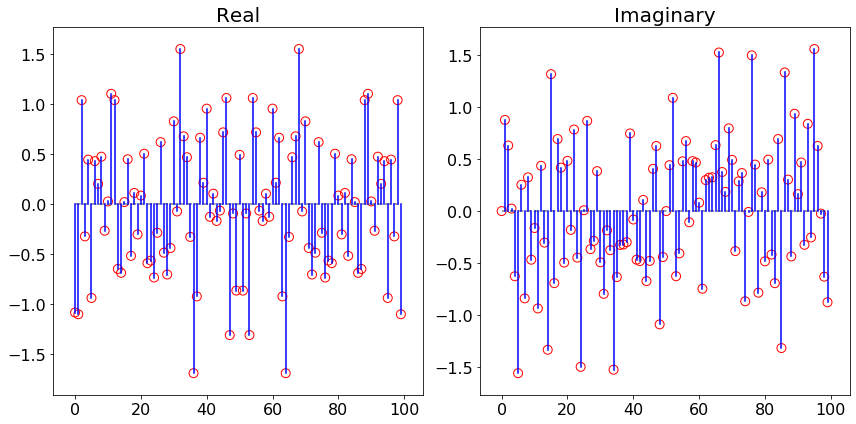

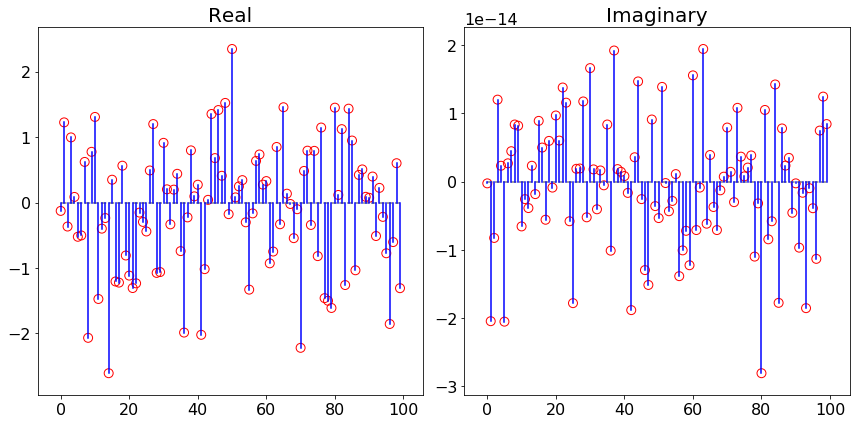

In [8]:
A_n = np.random.randn(100)
A_k = fourier_transform(A_n)
A_n_ift = fourier_transform(A_k, inverse=True)
plot_function(A_n)
plot_function(A_k)
plot_function(A_n_ift)

## Example 6
An exponential function, $N=50$.

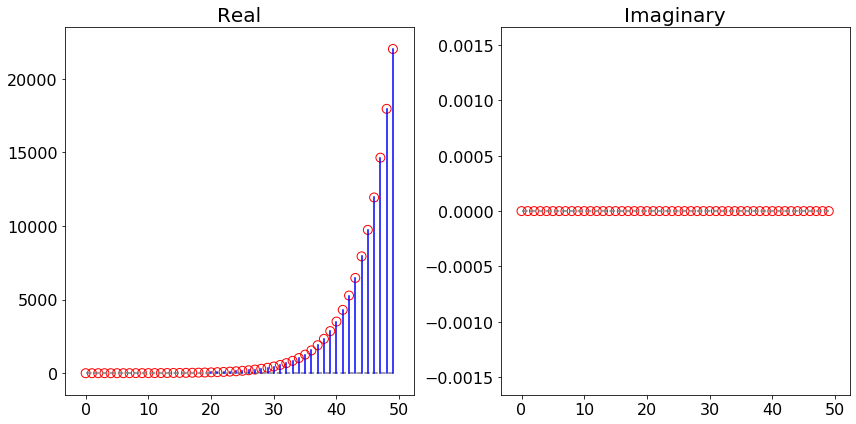

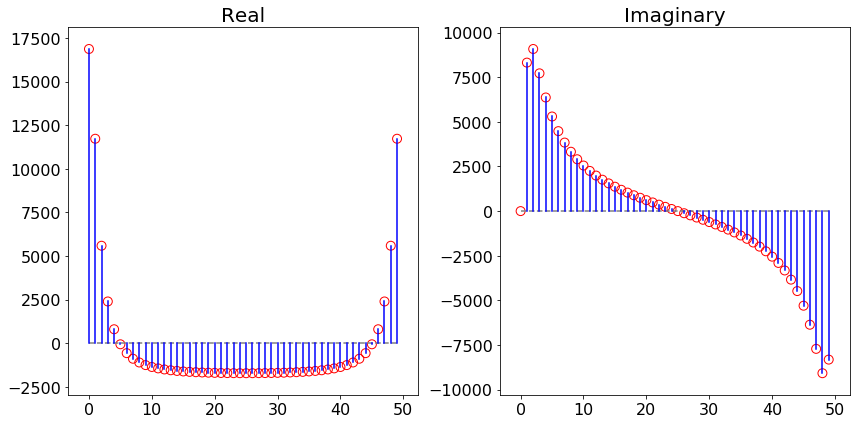

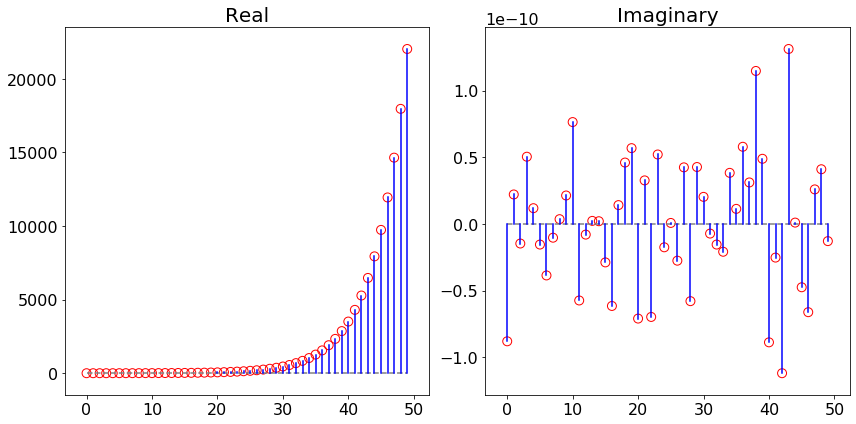

In [9]:
A_n = np.exp(np.linspace(0, 10, 50))
A_k = fourier_transform(A_n)
A_n_ift = fourier_transform(A_k, inverse=True)
plot_function(A_n)
plot_function(A_k)
plot_function(A_n_ift)

## Example 7
An exponential function with both real and imaginary parts, $N=50$.

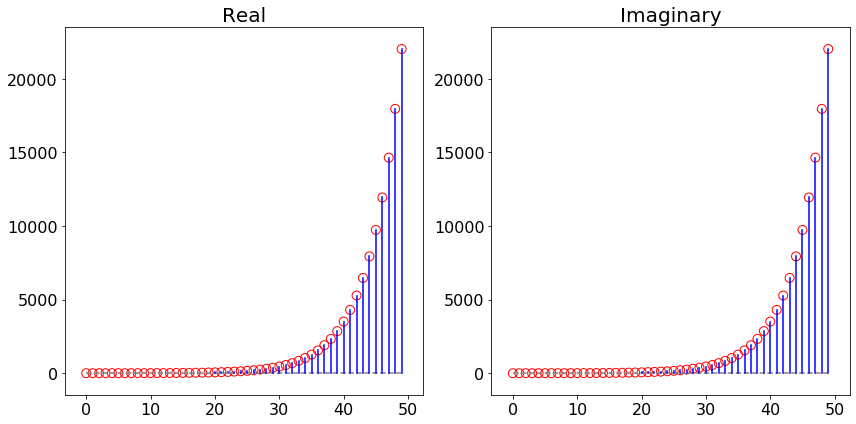

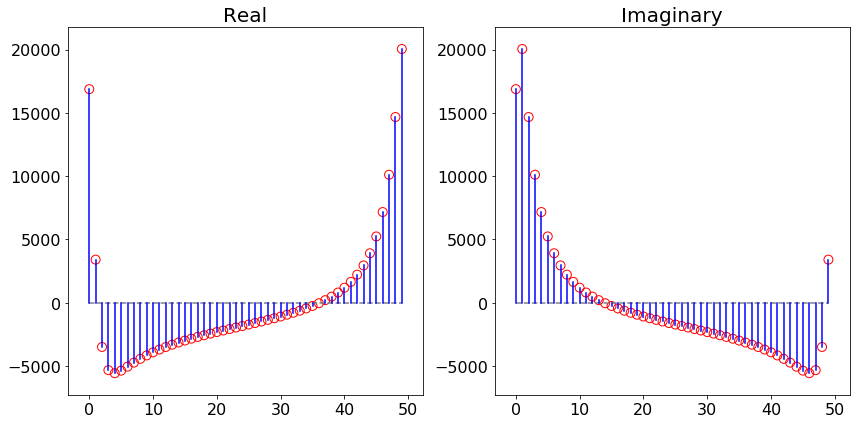

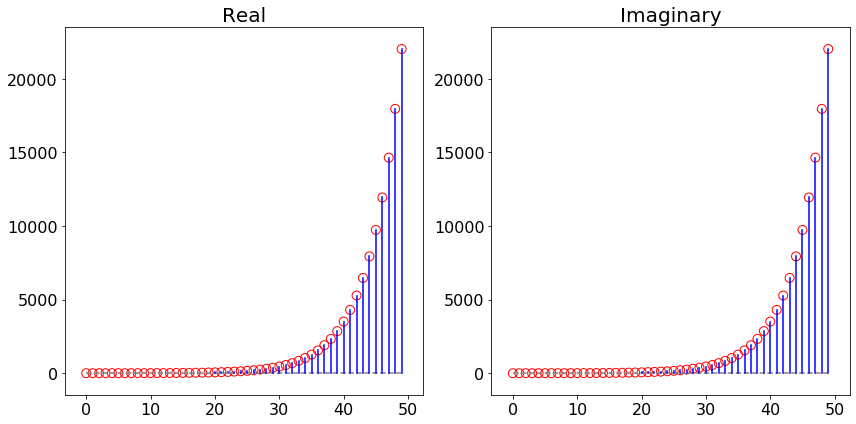

In [10]:
A_n = np.exp(np.linspace(0, 10, 50)) + 1j * np.exp(np.linspace(0, 10, 50))
A_k = fourier_transform(A_n)
A_n_ift = fourier_transform(A_k, inverse=True)
plot_function(A_n)
plot_function(A_k)
plot_function(A_n_ift)

## Better performance with fast Fourier transform
Notice that when $N$ is greater than 10000, the computation starts to slow down. Our naive discrete Fourier transform algorithm computes in complexity $O(N^2)$. Instead of using our own algorithm we can use numpy's fft function, which computes discrete Fourier transform in $O(N\log N)$. Note that the result here differs from our function by a factor of $1/\sqrt{N}$.

In [11]:
A_n = np.random.randn(1000000)
A_k = np.fft.fft(A_n)
A_n_ift = np.fft.ifft(A_k)

With the FFT algorithm even when $N=10^6$, we still get the result immediately. Since our plotting function is also slow, we will plot only part of the results.

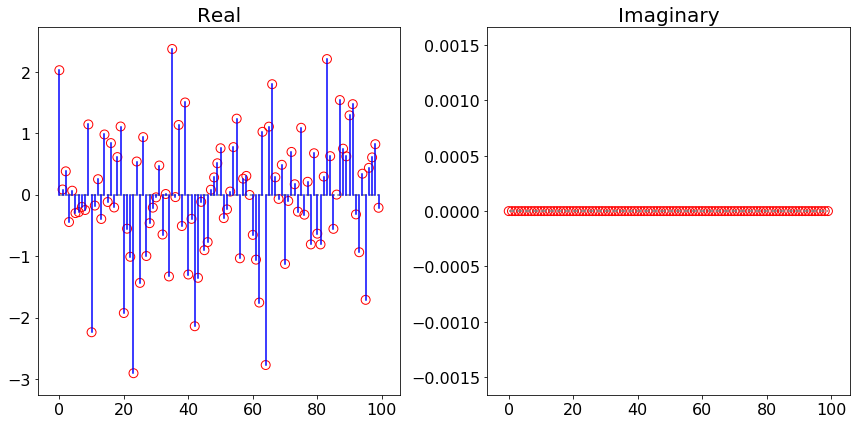

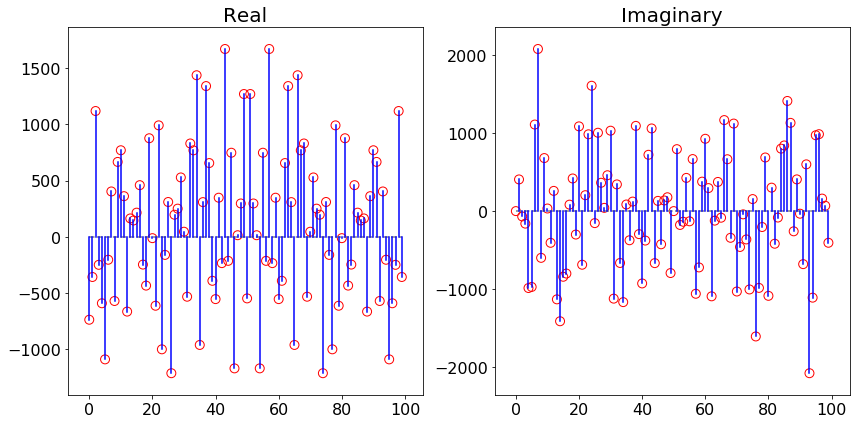

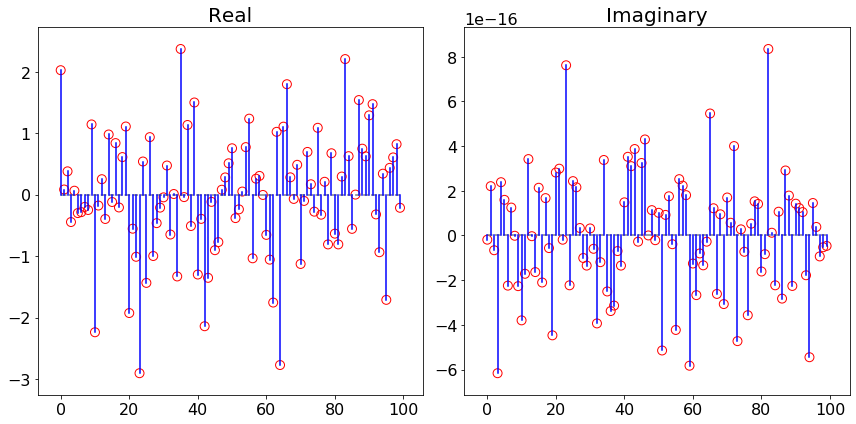

In [12]:
plot_function(A_n[::10000])
plot_function(A_k[::10000])
plot_function(A_n_ift[::10000])